In [5]:
from gnews import GNews
import pandas as pd

google_news = GNews(language = 'fr', country = 'CM')

def collect_data(queries, label):
  articles_list = []
  for q in queries:
    articles = google_news.get_news(q)
    for a in articles:
      articles_list.append({'text': a['title'], 'category': label})
  return articles_list


politics = collect_data(['Politique Cameroun', 'elections Afrique', 'gouvernement'],'Politique')
sports = collect_data(['Football Afrique', 'CAN'], 'Sport')
economy = collect_data(['Bourse Afrique', 'Investissement Afrique','Crise Economique Afrique'], 'Economy')

df = pd.DataFrame(politics + sports + economy)
df.to_csv('data/africa_news.csv', index=False)
print(f"Dataset Created {len(df)} titres")

Dataset Created 792 titres


In [14]:


import nltk
nltk.download('stopwords')
nltk.download('punkt')

import pandas as pd
from nltk.corpus import stopwords
import string
import re
import os

data_folder = "data"
try:
    os.mkdir(data_folder)
except FileExistsError:
    pass


french_stopwords = set(stopwords.words('french'))

def clean_text(text):
    if not isinstance(text, str):
      return ""
    text =text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)

    text = re.sub(r'\d+', '', text)

    words = text.split()
    cleaned_words= [w for w in words if w not in french_stopwords]

    return " ".join(cleaned_words)

df = pd.read_csv('data/africa_news.csv')
df['clean_text'] = df['text'].apply(clean_text)
df.to_csv('data/africa_news_cleaned.csv', index=False)
print("Dataset cleaned")

Dataset cleaned


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df['clean_text'].values
y = df['category'].values

label_encoder = LabelEncoder()

y_encoded =label_encoder.fit_transform(y)

print(label_encoder.classes_, "\n")

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)



['Economy' 'Politique' 'Sport'] 

(633, 2359)
(159, 2359)


Entraînement du modèle en cours...

🎯 Précision globale (Accuracy) : 0.99 (99.4%)者に教えてください

📊 Rapport de Classification :
              precision    recall  f1-score   support

     Economy       1.00      0.98      0.99        65
   Politique       0.98      1.00      0.99        57
       Sport       1.00      1.00      1.00        37

    accuracy                           0.99       159
   macro avg       0.99      0.99      0.99       159
weighted avg       0.99      0.99      0.99       159



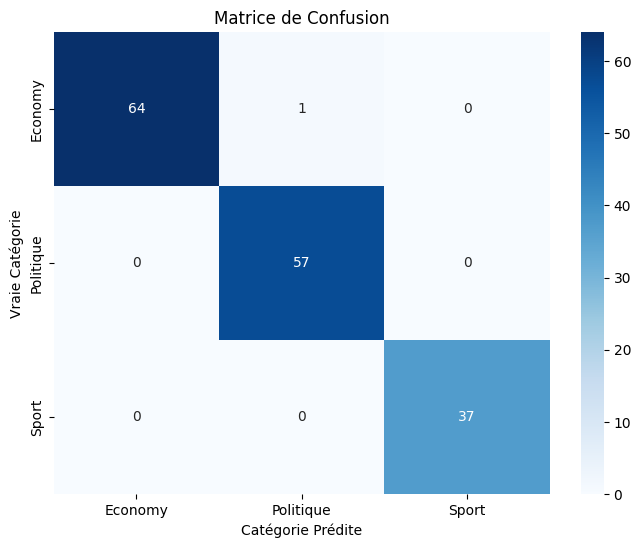

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)

print("Entraînement du modèle en cours...")
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


acc = accuracy_score(y_test, y_pred)
print(f"\n Précision globale (Accuracy) : {acc:.2f} ({acc*100:.1f}%)")

print("\n Rapport de Classification :")
target_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=target_names))

# C. Matrice de Confusion (Visualisation)
# Cela permet de voir où le modèle se trompe (ex: Il confond 'Politique' avec 'Economie' ?)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Real category')
plt.xlabel('Predicted category')
plt.title('Confusion matrix')
plt.show()

In [6]:
!pip install gnews pandas scikit-learn nltk
